# Implementing Discrete-Time basic Hebb's Rule 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# For interactive plotting
from matplotlib.widgets import Slider, Button, RadioButtons

# For saving/loading data
import pickle

import hebbian_learning as hl 

## Importing data

In [2]:
# import lab_2_1_data.csv
import csv
import pandas as pd

# Load the data
data = pd.read_csv('lab2_1_data.csv', header=None)
data = data.T


## Discretizing Hebb's Rule

From
$$ 
\tau_w\frac{dw}{dn}=vu
$$

---

$$
\begin{align*}
\tau_w\Delta w(n) = v(n)u(n) \\
v(n) = w(n)^T u(n) \;\;\;\\
w(n+1) = w(n) + \Delta v(n) \\
\end{align*}
$$

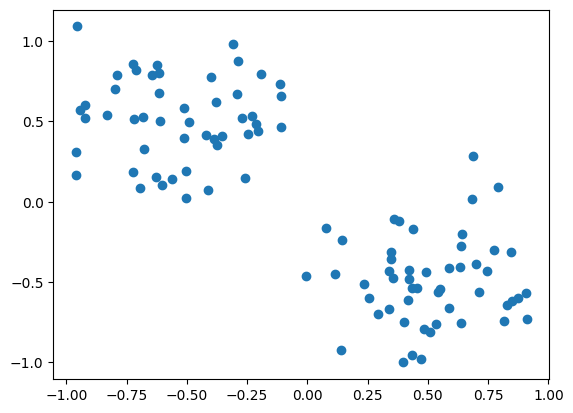

In [3]:
# plot data with scatteplot
plt.figure()
plt.plot(data[0], data[1], 'o')



Text(0, 0.5, 'Magnitude of the weights')

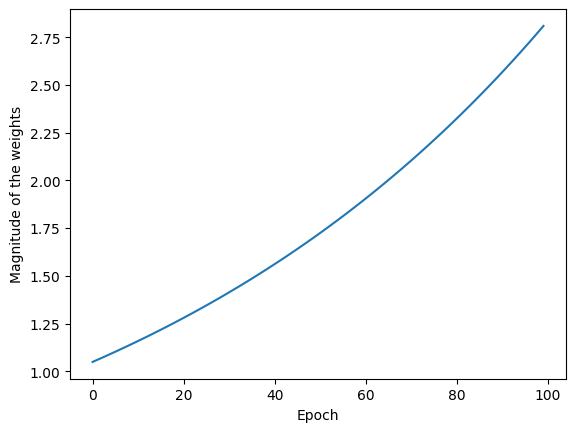

In [4]:
# Create a Hebbian learning rule object
hebb = hl.HebbianLearning(tau_w=0.1, eta=0.01, weights_dim=2)

# get data in input v and output u

v, u = data[0], data[1]

weights_history = hebb.train_hebbian_simple(data, epochs=100)

# plot the weights magnitude
# First we compute the magnitude of the weights
weights_magnitude = np.linalg.norm(weights_history, axis=1)


plt.figure()
plt.plot(weights_magnitude)
plt.xlabel('Epoch')
plt.ylabel('Magnitude of the weights')




Text(0, 0.5, 'Magnitude of the weights')

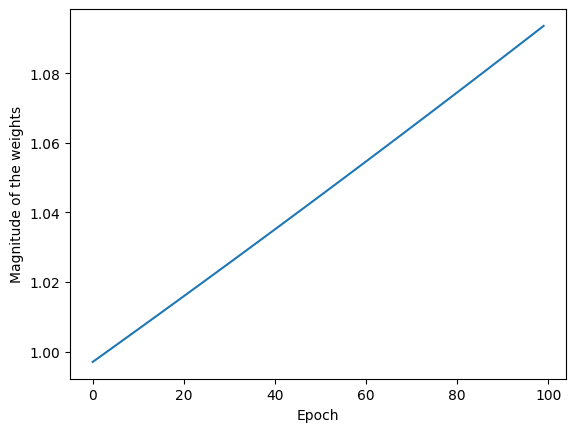

In [6]:
oja = hl.HebbianLearning(tau_w=0.1, eta=0.01, weights_dim=2)

weights_history_oja = oja.train_oja(data, epochs=100)

# plot the weights magnitude
# First we compute the magnitude of the weights
weights_magnitude_oja = np.linalg.norm(weights_history_oja, axis=1)


plt.figure()
plt.plot(weights_magnitude_oja)
plt.xlabel('Epoch')
plt.ylabel('Magnitude of the weights')


### Showing Eigendecomposition and PCA of Standard Hebb's Rule

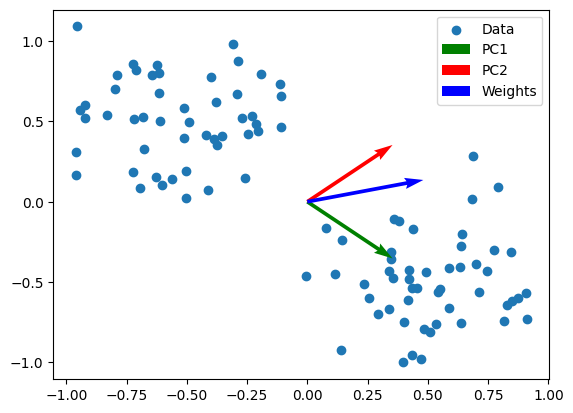

In [5]:
corr = np.corrcoef(data.T)

eig_values, eig_vectors = np.linalg.eig(corr)

plt.scatter(data[0], data[1])

#principal component
#plt.plot([0, eig_vectors[0,0]], [0, eig_vectors[1,0]], 'r')
#plt.plot([0, eig_vectors[0,1]], [0, eig_vectors[1,1]], 'r')

plt.quiver(0, 0, eig_vectors[0,0], eig_vectors[1,0], angles='xy', scale_units='xy', scale=2, color='g')
plt.quiver(0, 0, eig_vectors[0,1], eig_vectors[1,1], angles='xy', scale_units='xy', scale=2, color='r')

# add the standardized weights vector
weights_vector = weights_history[-1]

weights_vector = weights_vector / np.linalg.norm(weights_vector)

plt.quiver(0, 0, weights_vector[0], weights_vector[1], angles='xy', scale_units='xy', scale=2, color='b')
# legend
plt.legend(['Data', 'PC1', 'PC2', 'Weights'])


plt.show()


### Showing Eigendecomposition and PCA of Oja's Rule


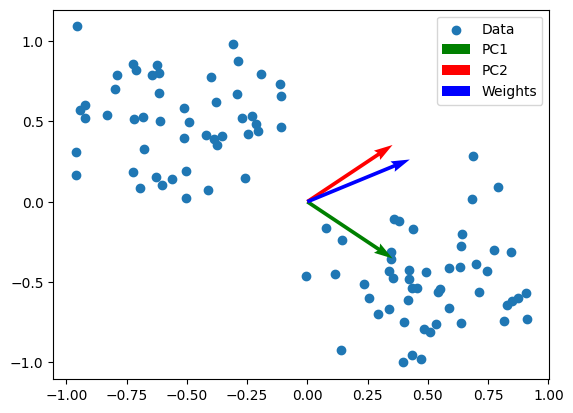

In [7]:
corr = np.corrcoef(data.T)

eig_values, eig_vectors = np.linalg.eig(corr)

plt.scatter(data[0], data[1])

#principal component
#plt.plot([0, eig_vectors[0,0]], [0, eig_vectors[1,0]], 'r')
#plt.plot([0, eig_vectors[0,1]], [0, eig_vectors[1,1]], 'r')

plt.quiver(0, 0, eig_vectors[0,0], eig_vectors[1,0], angles='xy', scale_units='xy', scale=2, color='g')
plt.quiver(0, 0, eig_vectors[0,1], eig_vectors[1,1], angles='xy', scale_units='xy', scale=2, color='r')

# add the standardized weights vector
weights_vector = weights_history_oja[-1]

weights_vector = weights_vector / np.linalg.norm(weights_vector)

plt.quiver(0, 0, weights_vector[0], weights_vector[1], angles='xy', scale_units='xy', scale=2, color='b')
# legend
plt.legend(['Data', 'PC1', 'PC2', 'Weights'])


